In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
from brokenaxes import brokenaxes
from wordcloud import WordCloud
from textblob import TextBlob
import random
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import Patch
from matplotlib import cm
from collections import Counter
import re

In [2]:
import os

print(os.listdir(r'D:/Code/Starry-Sticker-Shop-Analysis'))

['.git', '.ipynb_checkpoints', 'all_data.csv', 'color palette.png', 'EtsyListingsDownload.csv', 'EtsySoldOrderItems2020.csv', 'EtsySoldOrderItems2021.csv', 'EtsySoldOrderItems2022.csv', 'EtsySoldOrderItems2023.csv', 'ne_110m_admin_0_countries', 'ne_110m_admin_1_states_provinces', 'README.md', 'reviews.json', 'Starry-Sticker-Shop-Analysis.ipynb', 'Starry-Sticker-Shop-Analysis.twb', '~Starry-Sticker-Shop-Analysis__28164.twbr']


**Importing data from CSV files.**

In [3]:
orders_2020_df = pd.read_csv('D:/Code/Starry-Sticker-Shop-Analysis/EtsySoldOrderItems2020.csv')
orders_2021_df = pd.read_csv('D:/Code/Starry-Sticker-Shop-Analysis/EtsySoldOrderItems2021.csv')
orders_2022_df = pd.read_csv('D:/Code/Starry-Sticker-Shop-Analysis/EtsySoldOrderItems2022.csv')
orders_2023_df = pd.read_csv('D:/Code/Starry-Sticker-Shop-Analysis/EtsySoldOrderItems2023.csv')
reviews_df = pd.read_json('D:/Code/Starry-Sticker-Shop-Analysis/reviews.json')

In [4]:
print(orders_2020_df.columns)

Index(['Sale Date', 'Item Name', 'Buyer', 'Quantity', 'Price', 'Coupon Code',
       'Coupon Details', 'Discount Amount', 'Shipping Discount',
       'Order Shipping', 'Order Sales Tax', 'Item Total', 'Currency',
       'Transaction ID', 'Listing ID', 'Date Paid', 'Date Shipped',
       'Ship Name', 'Ship Address1', 'Ship Address2', 'Ship City',
       'Ship State', 'Ship Zipcode', 'Ship Country', 'Order ID', 'Variations',
       'Order Type', 'Listings Type', 'Payment Type', 'InPerson Discount',
       'InPerson Location', 'VAT Paid by Buyer', 'SKU'],
      dtype='object')


In [5]:
orders_df = pd.concat([orders_2020_df, orders_2021_df, orders_2022_df, orders_2023_df])

In [6]:
orders_df

,Sale Date,Item Name,Buyer,Quantity,Price,Coupon Code,Coupon Details,Discount Amount,Shipping Discount,Order Shipping,...,Ship Country,Order ID,Variations,Order Type,Listings Type,Payment Type,InPerson Discount,InPerson Location,VAT Paid by Buyer,SKU
0,12/31/20,"quali-tea boba | stickers, boba stickers, bull...",Stephanie Nguyen (skn525),1,4.50,NaN,NaN,0.0,0.0,0.0,...,United States,1899977282,Size:Small,online,listing,online_cc,NaN,NaN,0,NaN
1,12/31/20,"breakfast time | stickers, food stickers, bull...",Stephanie Nguyen (skn525),1,3.30,NaN,NaN,0.0,0.0,0.0,...,United States,1899977282,NaN,online,listing,online_cc,NaN,NaN,0,NaN
2,12/30/20,"quali-tea boba | stickers, boba stickers, bull...",NaN,1,4.50,NaN,NaN,0.0,0.0,0.0,...,United States,1899823336,Size:Small,online,listing,online_cc,NaN,NaN,0,NaN
3,12/30/20,"breakfast time | stickers, food stickers, bull...",Isabella (hb7l2hvu),1,3.30,NaN,NaN,0.0,0.0,0.0,...,United States,1899150138,NaN,online,listing,online_cc,NaN,NaN,0,NaN
4,12/29/20,"journey into outer space | stickers, planet st...",picklewood8,1,3.25,NaN,NaN,0.0,0.0,0.0,...,United States,1898550322,NaN,online,listing,online_cc,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,01/01/22,"back to school essentials | sticker flakes, st...",Abigail (jtcvnvjq),1,3.00,NaN,NaN,0.0,0.0,0.0,...,United States,2329488425,NaN,online,listing,online_cc,NaN,NaN,0,NaN
0,06/22/23,"back to school essentials | sticker flakes, st...",domoniquebradley1,1,3.00,NaN,NaN,0.0,0.0,0.0,...,United States,2931837964,NaN,online,listing,online_cc,NaN,NaN,0,NaN
1,05/10/23,"back to school essentials | sticker flakes, st...",Marie D Leon (marie123d),1,3.00,NaN,NaN,0.0,0.0,0.0,...,United States,2884157195,NaN,online,listing,online_cc,NaN,NaN,0,NaN
2,02/26/23,"breakfast time | sticker flakes stickers, food...",ReallyKoolCreations (kihu6xrvdvfum6z9),1,3.30,NaN,NaN,0.0,0.0,0.0,...,United States,2805945627,NaN,online,listing,online_cc,NaN,NaN,0,NaN


In [7]:
reviews_df

,reviewer,date_reviewed,star_rating,message,order_id
0,domoniquebradley1,07/12/2023,5,Revised: Seller reached out to me to send anot...,2931837964
1,Vinnie,12/11/2022,4,,2672096215
2,Emery,12/10/2022,5,Love the stickers! All the designs are super c...,2675093852
3,aeostria,10/22/2022,5,,2576362568
4,Margaret,07/20/2022,4,The designs are so cute and they are a perfect...,2495438828
...,...,...,...,...,...
78,Lindsey,08/27/2020,5,supa cute! definitely buying again! <3,1745068953
79,Lindsey,08/27/2020,5,love these so much!,1745068953
80,Kacie,08/19/2020,5,there are so many adorable stickers!,1731548983
81,Hope,08/15/2020,5,,1722218714


**Data Cleaning**
-
- Merge Order Item DataFrames and Reviews DataFrame
- Drop irrelevant columns
- Split "Item Name" column into "Item" and "Tags"
- Convert dates of various formats to datetime objects
- Convert state and country names to consistent format

In [8]:
#merge orders_df with reviews_df
reviews_df.rename(columns={'order_id': 'Order ID'}, inplace=True)
all_df = pd.merge(orders_df, reviews_df, on='Order ID', how='left')

In [9]:
all_df

,Sale Date,Item Name,Buyer,Quantity,Price,Coupon Code,Coupon Details,Discount Amount,Shipping Discount,Order Shipping,...,Listings Type,Payment Type,InPerson Discount,InPerson Location,VAT Paid by Buyer,SKU,reviewer,date_reviewed,star_rating,message
0,12/31/20,"quali-tea boba | stickers, boba stickers, bull...",Stephanie Nguyen (skn525),1,4.50,NaN,NaN,0.0,0.0,0.0,...,listing,online_cc,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,12/31/20,"breakfast time | stickers, food stickers, bull...",Stephanie Nguyen (skn525),1,3.30,NaN,NaN,0.0,0.0,0.0,...,listing,online_cc,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,12/30/20,"quali-tea boba | stickers, boba stickers, bull...",NaN,1,4.50,NaN,NaN,0.0,0.0,0.0,...,listing,online_cc,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,12/30/20,"breakfast time | stickers, food stickers, bull...",Isabella (hb7l2hvu),1,3.30,NaN,NaN,0.0,0.0,0.0,...,listing,online_cc,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,12/29/20,"journey into outer space | stickers, planet st...",picklewood8,1,3.25,NaN,NaN,0.0,0.0,0.0,...,listing,online_cc,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,01/01/22,"back to school essentials | sticker flakes, st...",Abigail (jtcvnvjq),1,3.00,NaN,NaN,0.0,0.0,0.0,...,listing,online_cc,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
279,06/22/23,"back to school essentials | sticker flakes, st...",domoniquebradley1,1,3.00,NaN,NaN,0.0,0.0,0.0,...,listing,online_cc,NaN,NaN,0,NaN,domoniquebradley1,07/12/2023,5.0,Revised: Seller reached out to me to send anot...
280,05/10/23,"back to school essentials | sticker flakes, st...",Marie D Leon (marie123d),1,3.00,NaN,NaN,0.0,0.0,0.0,...,listing,online_cc,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
281,02/26/23,"breakfast time | sticker flakes stickers, food...",ReallyKoolCreations (kihu6xrvdvfum6z9),1,3.30,NaN,NaN,0.0,0.0,0.0,...,listing,online_cc,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [10]:
#drop irrelevant columns
all_df = all_df.drop(columns= ['Buyer', 'Coupon Code', 'Coupon Details', 'Discount Amount', 'Shipping Discount', 'Order Shipping', 'Order Sales Tax', 
                              'Currency', 'Transaction ID', 'Listing ID', 'Date Paid', 'Ship Address1', 'Ship Address2', 'Ship City', 'Ship Zipcode', 'Order ID', 
                              'Order Type', 'Listings Type', 'Payment Type', 'InPerson Discount', 'InPerson Location', 'VAT Paid by Buyer', 'SKU', 
                                     'reviewer', 'date_reviewed'])
all_df.rename(columns={'star_rating': 'Rating'}, inplace=True)
all_df.rename(columns={'message': 'Review'}, inplace=True)

In [11]:
print(all_df['Item Name'].unique())

['quali-tea boba | stickers, boba stickers, bullet journal, stationery, crafts, pen pal, planners'
 'breakfast time | stickers, food stickers, bullet journal, stationery, crafts, pen pal, planners'
 'journey into outer space | stickers, planet stickers, bullet journal, stationery, crafts, pen pal, planners'
 'a starry christmas | stickers, christmas stickers, bullet journal, stationery, crafts, pen pal, planners'
 'a starry christmas | stickers, food stickers, bullet journal, stationery, crafts, pen pal, planners'
 '31 days of boba | stickers, boba stickers, bullet journal, stationery, crafts, pen pal, planners'
 'journey into outer space | sticker flakes, stickers, planet stickers, bullet journal, stationery, crafts, pen pal, planners'
 'a starry christmas | sticker flakes, stickers, christmas stickers, bullet journal, stationery, crafts, pen pal, planners'
 'breakfast time | sticker flakes stickers, food stickers, bullet journal, stationery, crafts, pen pal, planners'
 'holiday cooki

In [12]:
#split 'Item Name' column into 'Item' and 'Tags'
def split_custom_data(row):
    parts = row['Item Name'].split(' | ')
    return pd.Series({'Item': parts[0], 'Tags': parts[1]})

all_df[['Item', 'Tags']] = all_df.apply(split_custom_data, axis=1)
all_df = all_df.drop(columns="Item Name")

In [13]:
def titlecase(text):
    return text.title()

all_df['Item'] = all_df.get('Item').apply(titlecase)

In [14]:
pd.set_option('display.max_rows', 5)  #show all rows
pd.set_option('display.max_columns', 15)  #show all columns
all_df

,Sale Date,Quantity,Price,Item Total,Date Shipped,Ship Name,Ship State,Ship Country,Variations,Rating,Review,Item,Tags
0,12/31/20,1,4.5,4.5,01/04/2021,Stephanie Nguyen,CA,United States,Size:Small,NaN,NaN,Quali-Tea Boba,"stickers, boba stickers, bullet journal, stati..."
1,12/31/20,1,3.3,3.3,01/04/2021,Stephanie Nguyen,CA,United States,NaN,NaN,NaN,Breakfast Time,"stickers, food stickers, bullet journal, stati..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,02/26/23,1,3.3,3.3,03/05/2023,Tiffany SantaMaria,AZ,United States,NaN,NaN,NaN,Breakfast Time,"sticker flakes stickers, food stickers, bullet..."
282,01/19/23,1,3.3,3.3,01/28/2023,Teresa bone,SC,United States,NaN,NaN,NaN,Breakfast Time,"sticker flakes stickers, food stickers, bullet..."


In [15]:
#convert dates to datetime objects
all_df['Sale Date'] = pd.to_datetime(all_df['Sale Date'], format='%m/%d/%y')
all_df['Date Shipped'] = pd.to_datetime(all_df['Date Shipped'], format='%m/%d/%Y')

In [16]:
#sort dataframe by order date
all_df = all_df.sort_values(by='Sale Date', ascending=True)
all_df = all_df.reset_index(drop=True)

In [17]:
print("Number of rows in orders_df:", len(orders_df))
print("Number of rows in reviews_df:", len(reviews_df))
print("Number of rows in all_df:", len(all_df))

Number of rows in orders_df: 266
Number of rows in reviews_df: 83
Number of rows in all_df: 283


In [18]:
#drop duplicate rows generated by merge, reset index
duplicate_indexes = [10, 11, 21, 22, 48, 51, 115, 117, 120, 125, 126, 236, 237, 238, 239, 241, 242]
all_df = all_df.drop(duplicate_indexes)

In [19]:
all_df = all_df.reset_index(drop=True)

In [20]:
print("Number of rows in orders_df:", len(orders_df))
print("Number of rows in reviews_df:", len(reviews_df))
print("Number of rows in all_df:", len(all_df))

Number of rows in orders_df: 266
Number of rows in reviews_df: 83
Number of rows in all_df: 266


In [21]:
print(all_df['Ship State'].unique())

['CA' 'GA' 'TX' 'FL' 'AZ' 'MI' 'WA' 'OR' 'NJ' 'PA' 'MA' 'TN' 'NE' 'HI'
 'MD' 'KY' 'NC' 'NY' 'IL' 'CO' 'WI' 'OH' 'MO' 'OK' 'MN' 'VA' 'IN'
 'Lancashire' 'Kent' 'NSW' 'ON' nan 'Okinawa' 'NV' 'ND' 'ID' 'AK' 'SC']


In [22]:
#convert state and country names to usable format 
all_df[all_df['Ship State'].isin(['Lancashire', 'Kent','NSW', 'Okinawa']) | all_df['Ship State'].isna()]
all_df.iloc[119, all_df.columns.get_loc('Ship State')] = np.nan
all_df.iloc[138, all_df.columns.get_loc('Ship State')] = np.nan
all_df.iloc[139, all_df.columns.get_loc('Ship State')] = np.nan
all_df.iloc[168, all_df.columns.get_loc('Ship State')] = np.nan

In [23]:
all_df[all_df['Ship State'].isin(['Lancashire', 'Kent','NSW', 'Okinawa']) | all_df['Ship State'].isna()]

,Sale Date,Quantity,Price,Item Total,Date Shipped,Ship Name,Ship State,Ship Country,Variations,Rating,Review,Item,Tags
119,2021-04-06,1,3.30,3.30,2021-04-13,Lilia Williams,NaN,United Kingdom,NaN,NaN,NaN,Breakfast Time,"sticker flakes stickers, food stickers, bullet..."
138,2021-05-15,1,3.25,3.25,2021-05-19,Kiah McCann,NaN,United Kingdom,NaN,NaN,NaN,Journey Into Outer Space,"sticker flakes, stickers, planet stickers, bul..."
139,2021-05-19,1,4.50,4.50,2021-05-23,Michael Bradley,NaN,Australia,Size:Small,NaN,NaN,Quali-Tea Boba,"sticker flakes, stickers, boba stickers, bulle..."
151,2021-06-21,1,3.00,3.00,2021-06-24,Gobega Sritharan,NaN,United Kingdom,NaN,1.0,Still not arrived - disappointed in the service,Back To School Essentials,"sticker flakes, stickers, school stickers, bul..."
168,2021-08-12,2,3.00,6.00,2021-08-18,Elena Gushiken,NaN,Japan,NaN,5.0,I felt like I was opening a letter of an old f...,Back To School Essentials,"sticker flakes, stickers, school stickers, bul..."


In [24]:
#replace state abbreviations with full state names
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

all_df['Ship State'] = all_df['Ship State'].map(state_mapping)

In [25]:
all_df['Ship State']

0      California
1         Georgia
          ...    
264    California
265      Illinois
Name: Ship State, Length: 266, dtype: object

**Sales Trend Analysis: Understanding sales patterns and identify trends**
-
- Compare sales performance year-over-year and month-over-month
- Visualize sales trends over time using line chart, bar graph, heat map

In [26]:
all_df['Sale Month'] = all_df['Sale Date'].dt.month
all_df['Sale Year'] = all_df['Sale Date'].dt.year

In [27]:
month_count_df = all_df.groupby('Sale Month').count()['Item Total'].reset_index()

In [28]:
month_count_df

,Sale Month,Item Total
0,1,27
1,2,15
...,...,...
10,11,27
11,12,44


In [29]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
month_count_df['Sale Month'] = month_count_df['Sale Month'].map(month_mapping)

In [30]:
month_count_df = month_count_df.set_index('Sale Month')

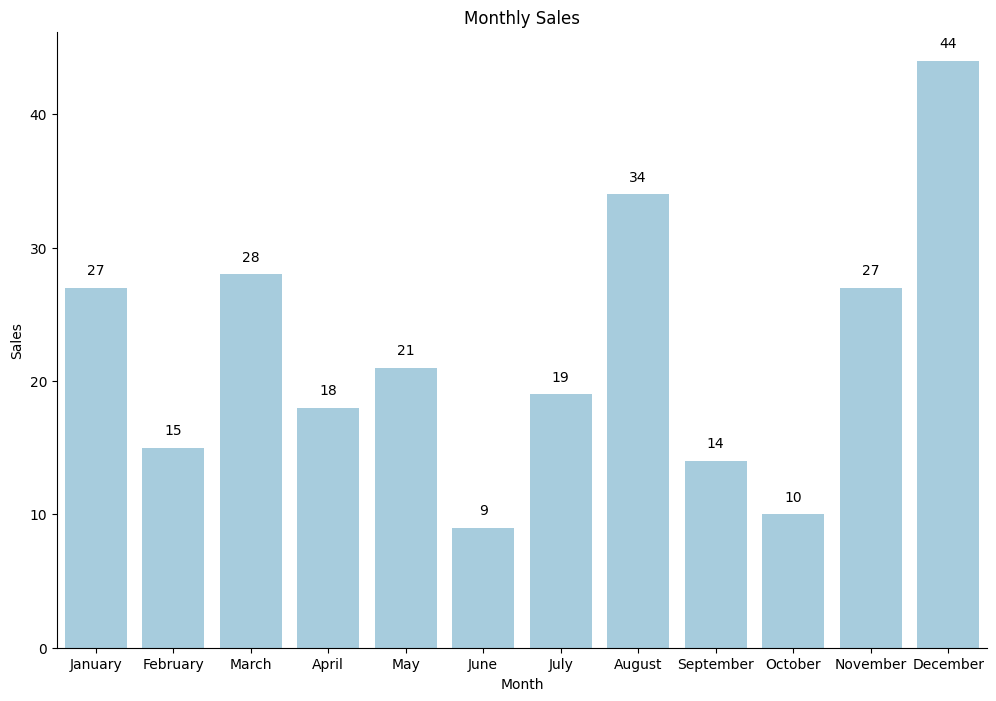

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=month_count_df.index, y='Item Total', data=month_count_df, color="#9ED0E6")

for index, row in month_count_df.iterrows():
    plt.text(index, row['Item Total'] + 1, row['Item Total'], color='black', ha="center")

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [32]:
year_month_count_df = all_df.groupby(['Sale Year', 'Sale Month']).count()['Item Total'].to_frame()

#fill in missing data
new_row = pd.DataFrame({'Item Total': [0]}, index=pd.MultiIndex.from_tuples([(2023, 3)], names=['Sale Year', 'Sale Month']))
year_month_count_df = pd.concat([year_month_count_df, new_row])

new_row = pd.DataFrame({'Item Total': [0]}, index=pd.MultiIndex.from_tuples([(2023, 4)], names=['Sale Year', 'Sale Month']))
year_month_count_df = pd.concat([year_month_count_df, new_row])

In [33]:
year_month_count_df = year_month_count_df.reset_index().sort_values(by=['Sale Year', 'Sale Month'], ascending=[True, True])

In [34]:
year_month_count_df['Sale Month'] = year_month_count_df['Sale Month'].map(month_mapping)

In [35]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year_month_count_df['Sale Month'] = pd.Categorical(year_month_count_df['Sale Month'], categories=month_order, ordered=True)
year_month_count_df
year_month_count_df = year_month_count_df.sort_values(by=['Sale Year', 'Sale Month'])

In [36]:
year_month_count_df

,Sale Year,Sale Month,Item Total
0,2020,July,4
1,2020,August,13
...,...,...,...
32,2023,May,1
33,2023,June,1


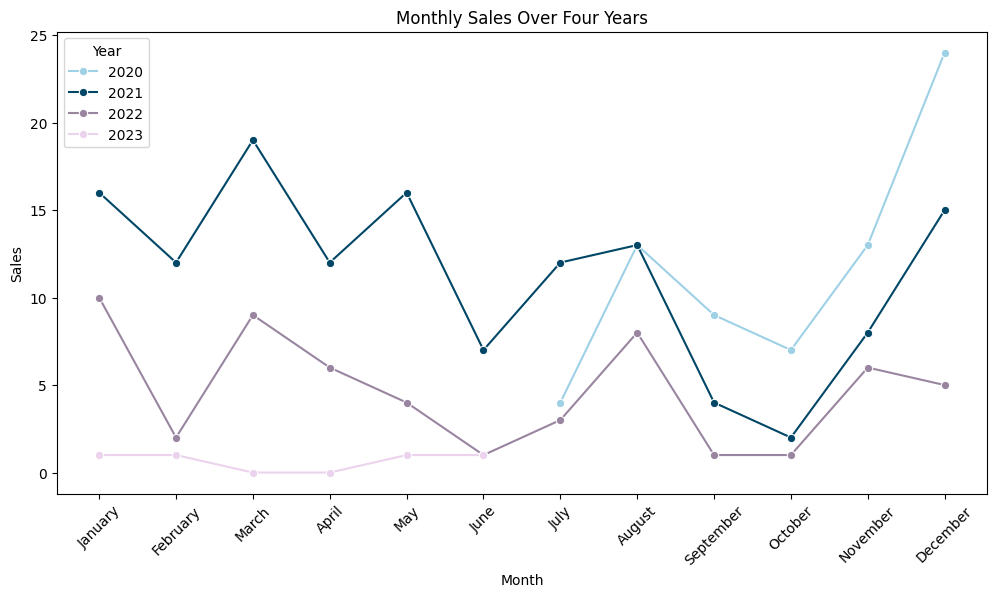

In [37]:
plt.figure(figsize=(12, 6))

year_month_count_colors = sns.color_palette(['#9ED0E6', '#004666', '#9A85A1', '#EBD2ED'])

sns.lineplot(data=year_month_count_df, x='Sale Month', y='Item Total', hue='Sale Year', marker='o', palette=year_month_count_colors)

plt.title('Monthly Sales Over Four Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

**Product Performance Analysis: Assess the performance of individual items**
-
- Analyze which products are the best-sellers and which have low sales
- Determine the average rating for each product
- Visualize product performance using pie chart and bar graph

In [38]:
pd.set_option('display.max_rows', 10)

In [39]:
items_count_series = all_df.groupby('Item').count().sort_values(by='Item Total', ascending=True)['Item Total']
items_count_df = items_count_series.to_frame(name='Item Total')

In [40]:
items_count_df

,Item Total
Item,
Holiday Cookies,7
31 Days Of Boba,9
A Starry Christmas,27
Journey Into Outer Space,35
Back To School Essentials,45
Quali-Tea Boba,47
Breakfast Time,96


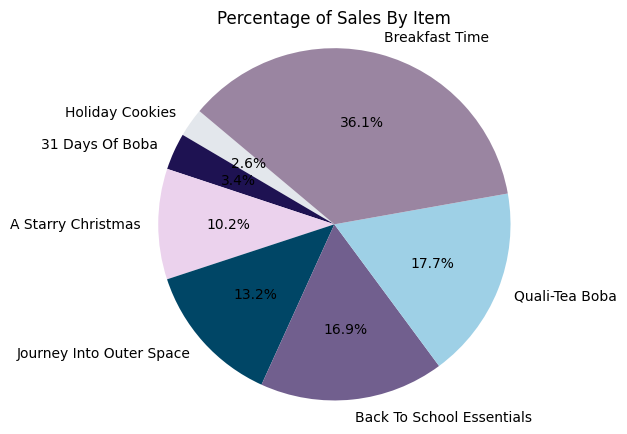

In [41]:
items_count_colors = ['#E3E7EC', '#1E1252', '#EBD2ED', '#004666', '#715F8E', '#9ED0E6', '#9A85A1']

plt.figure(figsize=(5,5))
plt.pie(items_count_df['Item Total'], labels=items_count_df.index, autopct='%1.1f%%', startangle=140, colors=items_count_colors)
plt.title('Percentage of Sales By Item')
plt.axis('equal')
plt.show()

In [42]:
items_rating_df = all_df.dropna(subset=['Rating']).get(['Rating','Item'])
items_rating_df = items_rating_df.groupby('Item').mean().round(2).sort_values(by='Rating', ascending=False)
items_rating_df

,Rating
Item,
31 Days Of Boba,5.00
Holiday Cookies,5.00
Journey Into Outer Space,4.93
Breakfast Time,4.91
A Starry Christmas,4.90
Quali-Tea Boba,4.87
Back To School Essentials,4.67


C:\Users\sarah\AppData\Local\Temp\ipykernel_7320\2790644309.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items_rating_df.index, y='Rating', data=items_rating_df, palette=items_ratings_colors, ax=ax1)
C:\Users\sarah\AppData\Local\Temp\ipykernel_7320\2790644309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items_rating_df.index, y='Rating', data=items_rating_df, palette=items_ratings_colors, ax=ax2)


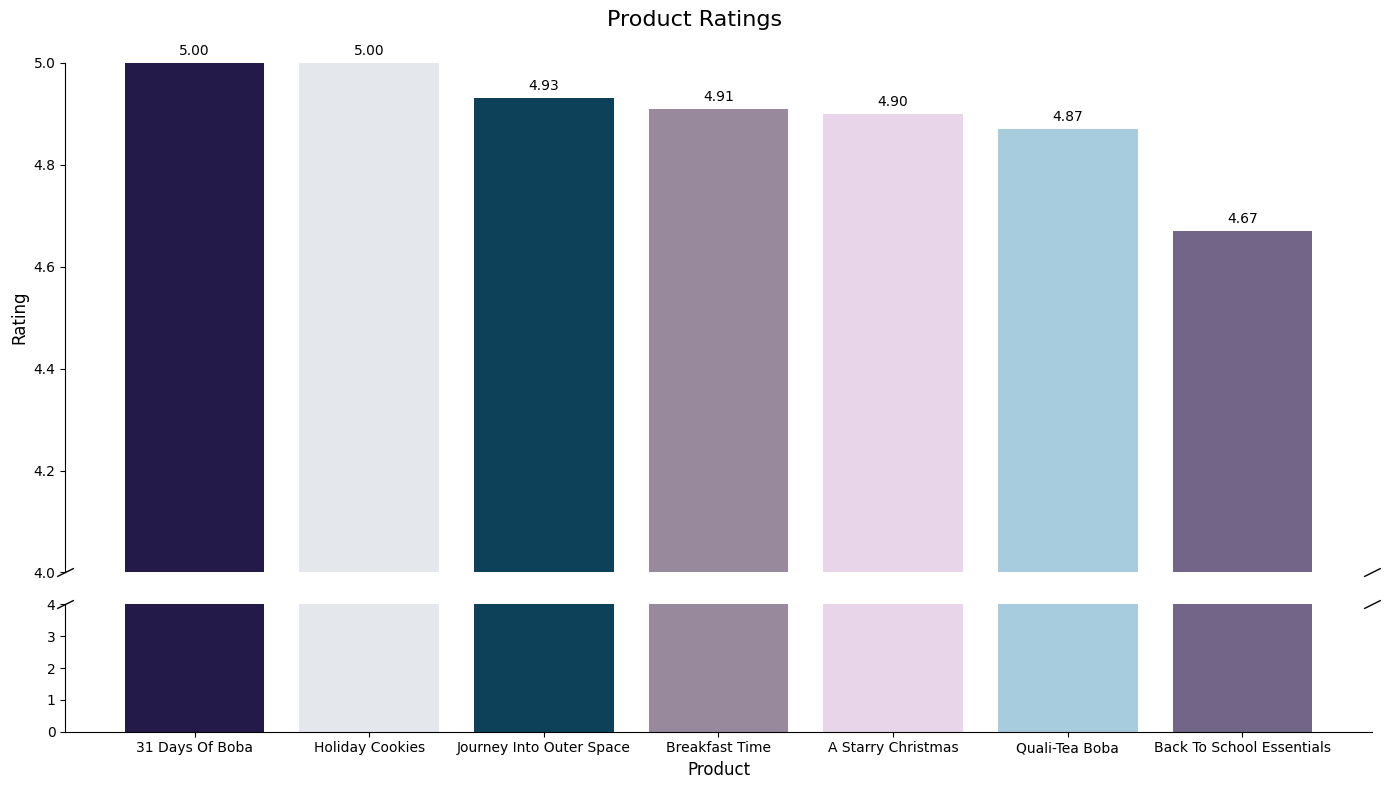

In [43]:
items_ratings_colors = ['#1E1252','#E3E7EC','#004666','#9A85A1', '#EBD2ED', '#9ED0E6', '#715F8E']

#create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 8), gridspec_kw={'height_ratios': [4, 1]})
fig.subplots_adjust(hspace=0.05)  # Adjust space between axes

#plot the data on both axes
sns.barplot(x=items_rating_df.index, y='Rating', data=items_rating_df, palette=items_ratings_colors, ax=ax1)
sns.barplot(x=items_rating_df.index, y='Rating', data=items_rating_df, palette=items_ratings_colors, ax=ax2)

#set different scales
ax1.set_ylim(4, 5)  #top plot
ax2.set_ylim(0, 4)  #bottom plot

#hide the spines between ax1 and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False, labelbottom=False, bottom=False)
ax2.xaxis.tick_bottom()

#add diagonal lines to indicate the break
d = 0.5  #proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

#set labels and title
ax2.set_xlabel('Product', fontsize=12)
ax1.set_ylabel('Rating', fontsize=12)
ax2.set_ylabel('')
plt.suptitle('Product Ratings', fontsize=16)

#annotate each bar with the rating value (only in the top plot)
for i, row in items_rating_df.iterrows():
    ax1.text(i, row['Rating'] + 0.01, f"{row['Rating']:.2f}", ha='center', va='bottom')

#remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)

#adjust x-axis labels
plt.setp(ax2.get_xticklabels(), rotation=0, ha='center')

plt.tight_layout()
plt.show()

**Customer Feedback Analysis: Understand customer sentiment and identify areas for improvement**
-
- Identify common themes and keywords in customer feedback using word cloud and sentiment score chart
- Calculate average processing time for orders
- Visualize regions at various sales levels using heat map

In [44]:
all_df

,Sale Date,Quantity,Price,Item Total,Date Shipped,Ship Name,Ship State,Ship Country,Variations,Rating,Review,Item,Tags,Sale Month,Sale Year
0,2020-07-17,1,3.30,3.30,2020-07-20,Tyler Lee,California,United States,NaN,NaN,NaN,Breakfast Time,"stickers, food stickers, bullet journal, stati...",7,2020
1,2020-07-18,1,3.25,3.25,2020-07-20,Hope Abernathy,Georgia,United States,NaN,5.0,Love them so much!! They are so cute and awesome!,Journey Into Outer Space,"stickers, planet stickers, bullet journal, sta...",7,2020
2,2020-07-25,1,4.50,4.50,2020-07-30,Sam K,California,United States,NaN,NaN,NaN,31 Days Of Boba,"stickers, boba stickers, bullet journal, stati...",7,2020
3,2020-07-26,1,4.50,4.50,2020-07-30,Nicole Pryor,Texas,United States,NaN,NaN,NaN,31 Days Of Boba,"stickers, boba stickers, bullet journal, stati...",7,2020
4,2020-08-02,1,3.30,3.30,2020-08-04,Maisha Huq,California,United States,NaN,NaN,NaN,Breakfast Time,"stickers, food stickers, bullet journal, stati...",8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2022-12-17,1,3.35,3.35,2022-12-25,Tatum Powell,Georgia,United States,NaN,NaN,NaN,A Starry Christmas,"sticker flakes, stickers, christmas stickers, ...",12,2022
262,2023-01-19,1,3.30,3.30,2023-01-28,Teresa bone,South Carolina,United States,NaN,NaN,NaN,Breakfast Time,"sticker flakes stickers, food stickers, bullet...",1,2023
263,2023-02-26,1,3.30,3.30,2023-03-05,Tiffany SantaMaria,Arizona,United States,NaN,NaN,NaN,Breakfast Time,"sticker flakes stickers, food stickers, bullet...",2,2023
264,2023-05-10,1,3.00,3.00,2023-05-13,Marie Leon,California,United States,NaN,NaN,NaN,Back To School Essentials,"sticker flakes, stickers, school stickers, bul...",5,2023


In [45]:
all_df['Processing Time'] = (all_df['Date Shipped'] - all_df['Sale Date']).dt.days

In [46]:
print("The average processing time between an order is placed and when it is shipped out is " + str(round(all_df['Processing Time'].mean(),2)) + " days.")

The average processing time between an order is placed and when it is shipped out is 5.68 days.


In [47]:
all_reviews_text = ' '.join(all_df['Review'].dropna().astype(str).values)

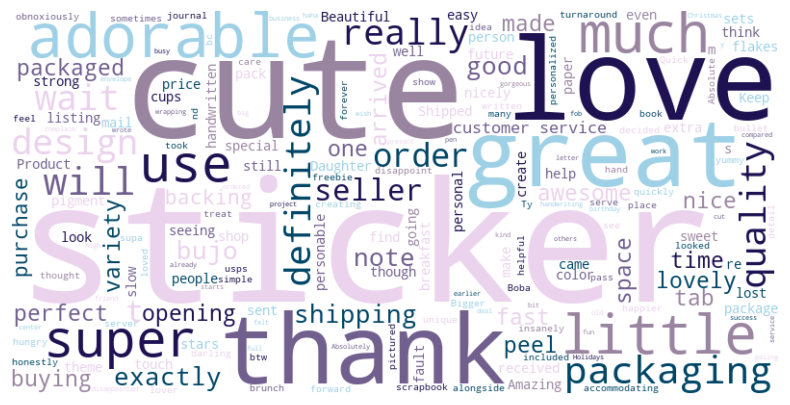

In [48]:
wordcloud_colors = ['#1E1252', '#004666','#9A85A1', '#EBD2ED', '#9ED0E6', '#715F8E']

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(wordcloud_colors)

#generate the word cloud
wordcloud = WordCloud(width=800, height=400, color_func=custom_color_func, background_color='white').generate(all_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  #hide the axes
plt.show()

In [49]:
all_df

,Sale Date,Quantity,Price,Item Total,Date Shipped,Ship Name,Ship State,...,Rating,Review,Item,Tags,Sale Month,Sale Year,Processing Time
0,2020-07-17,1,3.30,3.30,2020-07-20,Tyler Lee,California,...,NaN,NaN,Breakfast Time,"stickers, food stickers, bullet journal, stati...",7,2020,3
1,2020-07-18,1,3.25,3.25,2020-07-20,Hope Abernathy,Georgia,...,5.0,Love them so much!! They are so cute and awesome!,Journey Into Outer Space,"stickers, planet stickers, bullet journal, sta...",7,2020,2
2,2020-07-25,1,4.50,4.50,2020-07-30,Sam K,California,...,NaN,NaN,31 Days Of Boba,"stickers, boba stickers, bullet journal, stati...",7,2020,5
3,2020-07-26,1,4.50,4.50,2020-07-30,Nicole Pryor,Texas,...,NaN,NaN,31 Days Of Boba,"stickers, boba stickers, bullet journal, stati...",7,2020,4
4,2020-08-02,1,3.30,3.30,2020-08-04,Maisha Huq,California,...,NaN,NaN,Breakfast Time,"stickers, food stickers, bullet journal, stati...",8,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2022-12-17,1,3.35,3.35,2022-12-25,Tatum Powell,Georgia,...,NaN,NaN,A Starry Christmas,"sticker flakes, stickers, christmas stickers, ...",12,2022,8
262,2023-01-19,1,3.30,3.30,2023-01-28,Teresa bone,South Carolina,...,NaN,NaN,Breakfast Time,"sticker flakes stickers, food stickers, bullet...",1,2023,9
263,2023-02-26,1,3.30,3.30,2023-03-05,Tiffany SantaMaria,Arizona,...,NaN,NaN,Breakfast Time,"sticker flakes stickers, food stickers, bullet...",2,2023,7
264,2023-05-10,1,3.00,3.00,2023-05-13,Marie Leon,California,...,NaN,NaN,Back To School Essentials,"sticker flakes, stickers, school stickers, bul...",5,2023,3


In [50]:
#determine review category
def determine_review_category(text):
    if text.strip() != '':
        if 'service' in text.lower():
            return 'Service'
        if 'ship' in text.lower():
            return 'Shipping'
        else:
            return 'Product'
    else:
        return np.nan

all_df['Review Category'] = all_df['Review'].dropna().apply(determine_review_category)

In [51]:
#function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    if text.strip() != '':
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    else:
        return np.nan

#apply sentiment analysis to each row of text data
all_df['Sentiment'] = all_df['Review'].dropna().apply(calculate_sentiment)

#aggregate sentiment scores by category
sentiment_by_category_series = all_df.groupby('Review Category')['Sentiment'].mean()

In [52]:
sentiment_by_category_df = round(sentiment_by_category_series, 2).to_frame()

In [53]:
sentiment_by_category_df

,Sentiment
Review Category,
Product,0.47
Service,0.37
Shipping,0.28


<Figure size 1000x600 with 0 Axes>

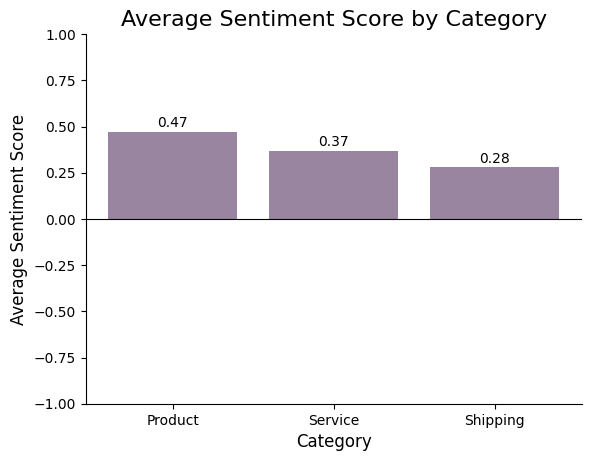

In [54]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
bars = ax.bar(sentiment_by_category_df.index, sentiment_by_category_df['Sentiment'], color='#9A85A1')

plt.title('Average Sentiment Score by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=0)

#annotate each bar with the rating value (only in the top plot)
for i, row in sentiment_by_category_df.iterrows():
    ax.text(i, row['Sentiment'] + 0.01, f"{row['Sentiment']:.2f}", ha='center', va='bottom')

#remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(-1, 1)
ax.axhline(0, color='black', linewidth=0.8)

plt.show()

In [55]:
print(all_df['Ship State'].unique())

['California' 'Georgia' 'Texas' 'Florida' 'Arizona' 'Michigan'
 'Washington' 'Oregon' 'New Jersey' 'Pennsylvania' 'Massachusetts'
 'Tennessee' 'Nebraska' 'Hawaii' 'Maryland' 'Kentucky' 'North Carolina'
 'New York' 'Illinois' 'Colorado' 'Wisconsin' 'Ohio' 'Missouri' 'Oklahoma'
 'Minnesota' 'Virginia' 'Indiana' nan 'Nevada' 'North Dakota' 'Idaho'
 'Alaska' 'South Carolina']


In [56]:
state_count_series = all_df.groupby('Ship State').count().dropna().sort_values(by='Item Total', ascending=True)['Item Total']
state_count_df = state_count_series.to_frame(name='Item Total').reset_index()
countries_count_series= all_df.groupby('Ship Country').count().sort_values(by='Item Total', ascending=True)['Item Total']
countries_count_df = countries_count_series.to_frame(name='Item Total').reset_index()
countries_count_df.loc[4, 'Ship Country'] = 'United States of America'

C:\Users\sarah\AppData\Local\Temp\ipykernel_7320\33443811.py:25: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  countries_gdf[countries_gdf['Item Total'] > outlier_threshold].plot(column='Item Total', color=outlier_color, linewidth=0.8, ax=ax, edgecolor='gray', legend=True)


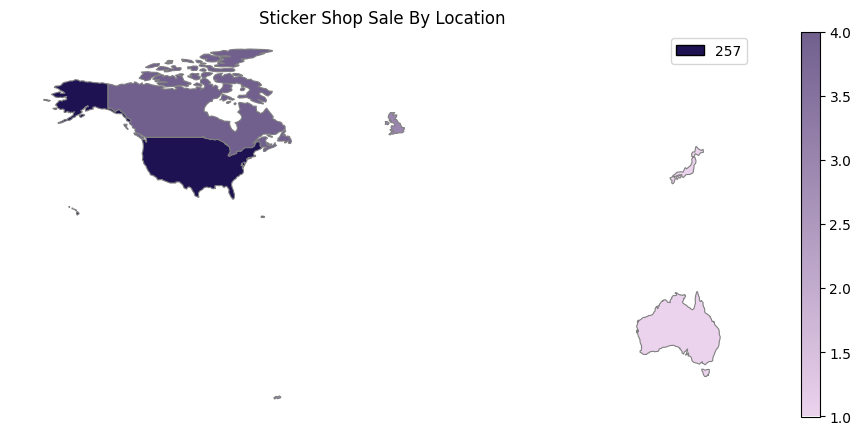

In [57]:
#load the shapefile for all countries
countries_shapefile_path = 'D:/Code/Starry-Sticker-Shop-Analysis/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
countries_gdf = gpd.read_file(countries_shapefile_path)

#merge the GeoDataFrame with the intensity data
countries_gdf = countries_gdf.merge(countries_count_df, how='left', left_on='SOVEREIGNT', right_on='Ship Country')

#determine outlier threshold
outlier_threshold = 4
outlier_color = '#1E1252'

#define colormap for majority of data
colors = ['#ebd2ed', '#715f8e']  #colors for majority data
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
#plotting
fig, ax = plt.subplots(figsize=(12, 5))

#normalize data excluding outliers
norm = Normalize(vmin=countries_gdf['Item Total'].min(), vmax=outlier_threshold)

#plot GeoDataFrame excluding outliers with majority colormap
countries_gdf[countries_gdf['Item Total'] <= outlier_threshold].plot(column='Item Total', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='gray', legend=True, norm=norm)

#plot outliers separately with specified color
countries_gdf[countries_gdf['Item Total'] > outlier_threshold].plot(column='Item Total', color=outlier_color, linewidth=0.8, ax=ax, edgecolor='gray', legend=True)

#customize plot settings
ax.set_aspect('auto')
ax.set_title('Sticker Shop Sale By Location')
ax.set_axis_off()

#manually add legend for outlier color
legend_elements = [Patch(facecolor=outlier_color, edgecolor='black', label='257')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

C:\Users\sarah\AppData\Local\Temp\ipykernel_7320\3727490881.py:30: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  us_gdf[us_gdf['Item Total'] > outlier_threshold].plot(column='Item Total', color=outlier_color, linewidth=0.8, ax=ax, edgecolor='gray', legend=True)


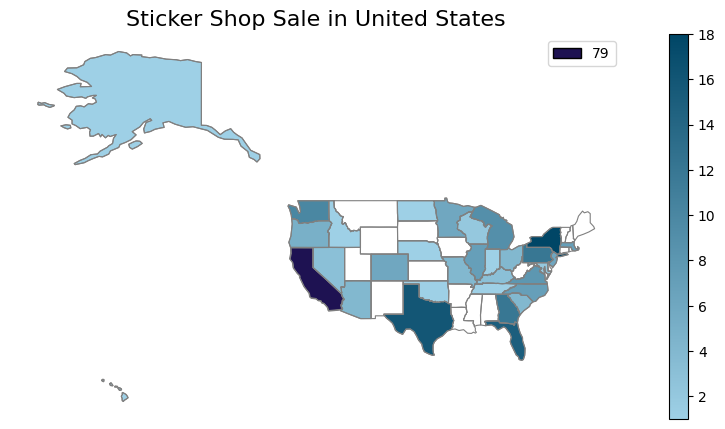

In [58]:
#load the shapefile for US states
#update the path to the location of the extracted shapefile on your system
us_shapefile_path = 'D:/Code/Starry-Sticker-Shop-Analysis/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp'
us_gdf = gpd.read_file(us_shapefile_path)

#merge the GeoDataFrame with the intensity data
us_gdf = us_gdf.merge(state_count_df, how='left', left_on='name', right_on='Ship State')

#determine outlier threshold
outlier_threshold = 18
outlier_color = '#1E1252'

#define colormap for majority of data
colors = ['#9ed0e6', '#004666']  #colors for majority data
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

#normalize data excluding outliers
norm = Normalize(vmin=us_gdf['Item Total'].min(), vmax=outlier_threshold)

#plotting
fig, ax = plt.subplots(figsize=(12, 5))

#plot state boundaries with a light color
us_gdf.boundary.plot(ax=ax, linewidth=0.8, color='gray')

#plot GeoDataFrame excluding outliers with majority colormap
us_gdf[us_gdf['Item Total'] <= outlier_threshold].plot(column='Item Total', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='gray', legend=True, norm=norm)

#plot outliers separately with specified color
us_gdf[us_gdf['Item Total'] > outlier_threshold].plot(column='Item Total', color=outlier_color, linewidth=0.8, ax=ax, edgecolor='gray', legend=True)

#customize plot settings
ax.set_title('Sticker Shop Sale in United States', fontsize=16)
ax.set_axis_off()

#manually add legend for outlier color
legend_elements = [Patch(facecolor=outlier_color, edgecolor='black', label='79')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

**Exporting CSVs for Tableau**
-

In [67]:
all_df.to_csv('all_data.csv', index=False)